In [1]:
import sys
sys.path.append("../../")

This is an experiment of showing how the reference point affect the hypervolume computation in BoTorch.
- BoTorch sets the reference point in their benchmark problems a bit different from other library.
- The reference point is actually within the range of the objective values (See BraninCurrin as an example)
- What they do internally is that:
  1. Assume input is maximization, and turn it into minimization problem internally
  2. Conduct objective thresholding: if a input observation is outside of the range of reference point, set the value as reference point and the hypervolume is therefore 0.

In [2]:
import torch
from botorch.test_functions.multi_objective import BraninCurrin, DTLZ1, DTLZ2

In [3]:
problem = BraninCurrin(negate=False)
print(f"max_hv: {problem.max_hv}\nref_point: {problem.ref_point}")

max_hv: 59.36011874867746
ref_point: tensor([18.,  6.])


In [4]:
from botorch.utils.sampling import draw_sobol_samples

def generate_initial_data(problem, n=2000):
    # generate training data
    train_x = draw_sobol_samples(bounds=problem.bounds, n=n, q=1).squeeze(1)
    train_obj = problem(train_x)
    return train_x, train_obj

In [5]:
X_obs, y_obs = generate_initial_data(problem)

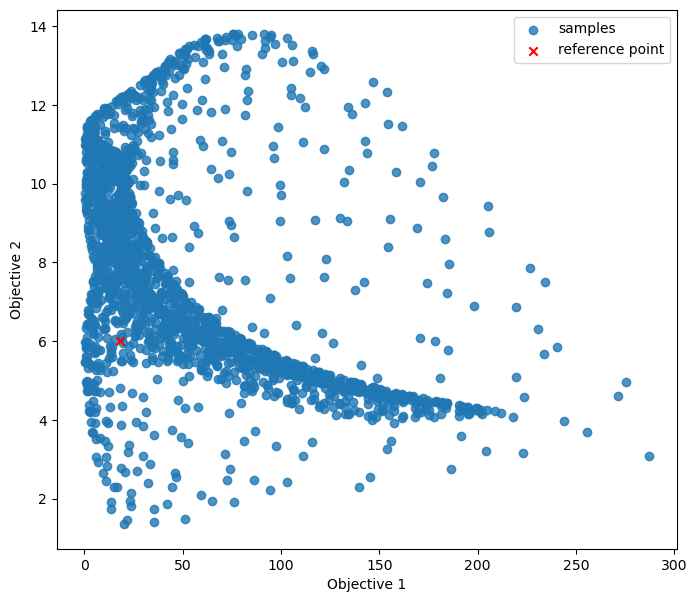

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 7))
cm = plt.colormaps["viridis"]

ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(
    y_obs[:, 0],
    y_obs[:, 1],
    alpha=0.8,
    label='samples'
)
ax.scatter(*problem.ref_point, marker='x', color='red', label='reference point')
ax.set_xlabel("Objective 1")
ax.set_ylabel("Objective 2")
ax.legend()
plt.show()

In [7]:
from botorch.utils.multi_objective.box_decompositions.dominated import DominatedPartitioning

y_eval = torch.tensor([[10, 5]])
bd = DominatedPartitioning(ref_point=problem.ref_point, Y=y_eval)
volume = bd.compute_hypervolume().item()
volume

0